
<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 03 <h2>

The Objectives of this weeks lab is to implement and understand different methods of Interpolation. 
<br>

In the mathematical field of numerical analysis, interpolation is a type of estimation, a method of constructing new data points within the range of a discrete set of known data points.

In engineering and science, one often has a number of data points, obtained by sampling or experimentation, which represent the values of a function for a limited number of values of the independent variable. It is often required to interpolate, i.e., estimate the value of that function for an intermediate value of the independent variable. A closely related problem is the approximation of a complicated function by a simple function. Suppose the formula for some given function is known, but too complicated to evaluate efficiently. A few data points from the original function can be interpolated to produce a simpler function which is still fairly close to the original. The resulting gain in simplicity may outweigh the loss from interpolation error. For more basics of interpolation check interpolation on  [Wikipedia](https://en.wikipedia.org/wiki/Interpolation) 
 

At the successful completion of this lab you should be able to implement different methods of linear and non linear interpolation. 



Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot. For interpolation lectures, you can have a look at the class [lecture.](http://mathforcollege.com/nm/mws/gen/05inp/mws_gen_inp_txt_lagrange.pdf) 


## Task 01: Implementing $n^{th}$ order lagrangian interpolation ##
The upward velocity of a rocket is given in the following table. 

| t (s) |  v(t) (m/s) |
| --- | --- | 
| 0 | 0 | 
| 10 | 227.04 | 
| 15 | 362.78 | 
| 20 | 517.35 | 
| 22.5 | 602.97 | 
| 30 | 901.67 | 
| 32.5 | 1010.27 | 
| 37 | 1125 | 
| 40 | 1175 | 
| 42 | 1205 | 
| 45 | 1230 | 
| 49 | 1260 | 
| 52 | 1290 | 
| 54 | 1340 | 


*    

*    Determine the value of the velolcity at $t = 27$ using an $ n^{th}$ order lagrangian interpolation. Your solution should take $n$ as an input and should be able to select closest $(n+1)$ points for finding out the lagrangian coeffecients. 

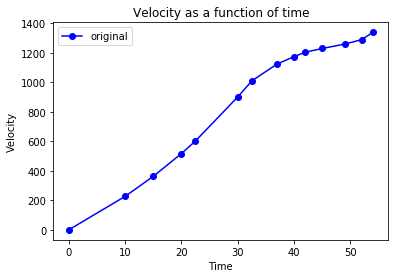

In [58]:
#dataset description
import numpy as np
import matplotlib.pyplot  as plt  
t = np.array([0,10,15,20,22.5,30,32.5,37,40,42,45,49,52,54])
vt = np.array([0,227.04,362.78,517.35,602.97,901.67,1010.27,1125,1175,1205,1230,1260,1290,1340])
plt.plot(t, vt, color='b', marker='o', label='original')
plt.title('Velocity as a function of time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()


Take $n$ as an input [Try values like 2, 3, 4] and select closest $(n+1)$ data points from the given data. 

In [0]:
from heapq import nsmallest

def trimmer__(t_in, vt_in, n, x_in):
  
    # t_in : time list
    # vt_in: velocity list
    # x_in : value of t at which vt should be calculated
    # output : closest n+1 points to the query
    dic=dict(zip(t_in,vt_in))
    t_trimmed=nsmallest(n+1,dic, key=lambda x: abs(x-x_in) )
    vt_trimmed=[dic[a] for a in t_trimmed] 

    output = [t_trimmed, vt_trimmed]
    return output

In [66]:
t_trimmed,vt_trimmed = trimmer__(t,vt,5,27)
print(t_trimmed,vt_trimmed)

[30.0, 22.5, 32.5, 20.0, 37.0, 15.0] [901.67, 602.97, 1010.27, 517.35, 1125.0, 362.78]


In [0]:
def Li(t_trim, x, i):
    # li: ith lagrangian multiplier
    li=1
    for j in range(len(t_trim)):
      if(j!=i):
        li=li*((x-t_trim[j])/(t_trim[i]-t_trim[j]))
    return li
    

In [67]:
Li(t_trimmed,27,0)

1.0559999999999998

In [0]:
def nth_lagrangian(t, vt, x, n):
    # t: input time list
    # vt: input velocity list
    # x : value of t at which vt should be calculated
    # n : order of the lagrangian interpolation
    # At first select n+1 closest data points from the given data and then from those data points,
    #  calulate the lagrangian multipliers. 
    #>>>>>>> use trimmer__ function here <<<<<<<<<<
    t_trimmed,vt_trimmed=trimmer__(t,vt,n,x)
    # Calculate the lagrangian multipliers and store them in an array

    L=[]
    for i in range(n+1):
      L.append(Li(t_trimmed,x,i))
    #>>>> you have to implement function Li() here and call that <<<<

    value=0
    for j in range(n+1):
      value=value+(L[j]*vt_trimmed[j])

    return value



In [64]:
print(nth_lagrangian(t,vt,27,4))

770.4582387018254


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


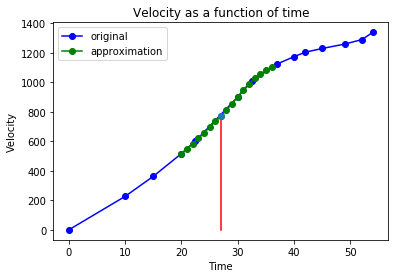

In [70]:
# plot the original data
# plot the approximation within n+1 data points using your calculated interpolant
# plot the single point x and velocity at x with a stem plot.

t_trimmed, vt_trimmed = trimmer__(t,vt,4,27)
x_axis=np.arange(start = min(t_trimmed), stop=max(t_trimmed), step = 1 )
y_axis=[nth_lagrangian(t,vt,i,4) for i in x_axis]

plt.plot(t, vt, color='b', marker='o', label='original')
plt.plot(x_axis,y_axis,color='g',marker='o', label='approximation')
plt.stem([27],[nth_lagrangian(t,vt,27,4)],linefmt= 'r')
plt.title('Velocity as a function of time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()


### Observations ###
The $n^{th}$ order Lagrangian interpolation let's us estimate new data points within a range of data points. Here the Lagrangian interpolation is implemented and the approximation within n+1 data points has been estimated. As we can see from the graph the approximated data points are within the range of the actual data points as the graphs concides.